In [1]:
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

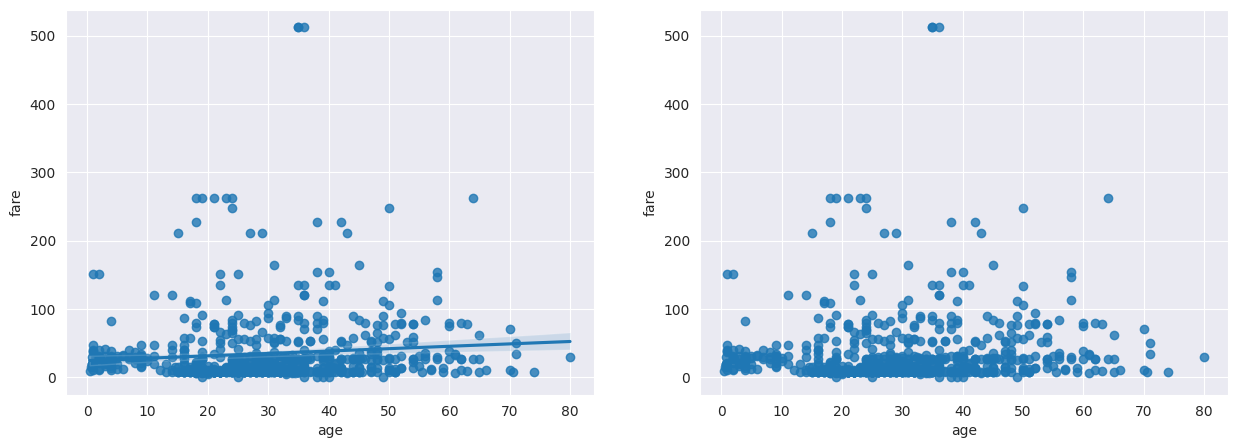

In [7]:
# 회귀 : 예측 현재의 값을 가지고 미래를 예측... 가장 기본 방정식... 1창 방정식
# 회귀선이 있는 산점도
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(data = titanic, x = 'age', y='fare', ax = ax1)
sns.regplot(data = titanic, x = 'age', y='fare', ax = ax2, fit_reg=False)
plt.show()

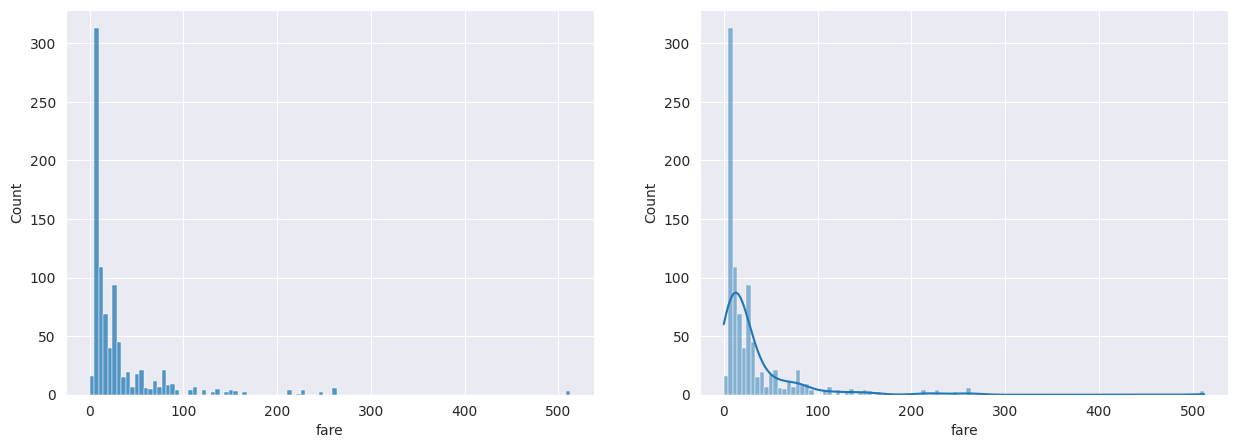

In [12]:
# 히스토그램/ 밀도 그래프
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 기본값
sns.histplot(titanic['fare'], ax=ax1)
sns.histplot(titanic['fare'], kde=True, ax=ax2)
plt.show()

In [14]:
# 히트맵
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
table = titanic.pivot_table(index = ['sex'], columns=['class'], aggfunc='size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


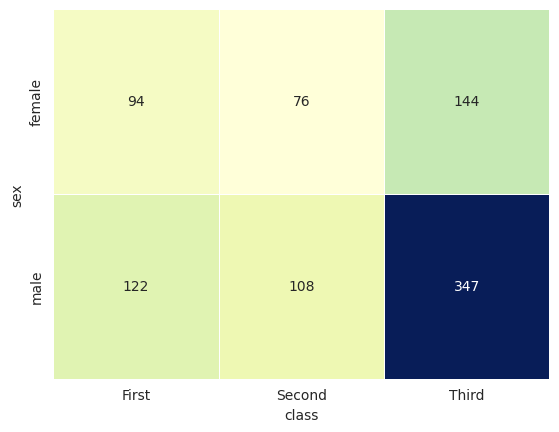

In [36]:
sns.heatmap(table ,
            annot = True, fmt='d',
            cmap = 'YlGnBu',  # 컬러 맵
            linewidth = .5,   # 구분 선
            cbar = False  # 컬러 바 표시 여부
            )
plt.show()

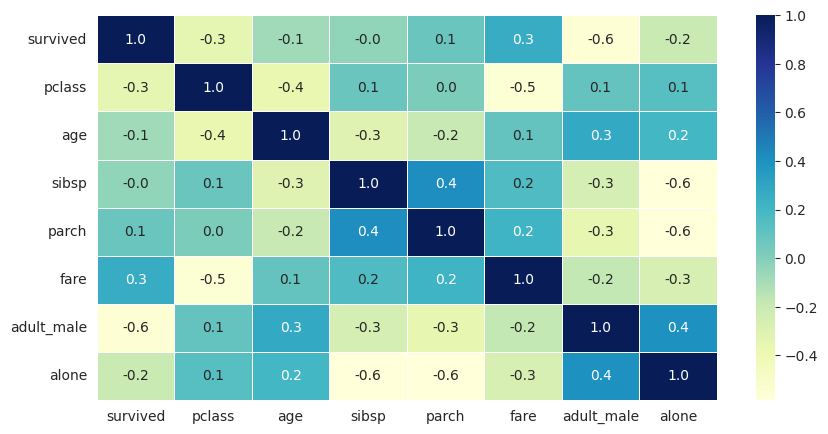

In [43]:
# 상관관계 htimap
plt.figure(figsize=(10,5))
sns.heatmap(titanic.corr() ,
            annot = True, fmt='.1f',
            cmap = 'YlGnBu',  # 컬러 맵
            linewidth = .5,   # 구분 선
            # cbar = False  # 컬러 바 표시 여부
            )
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


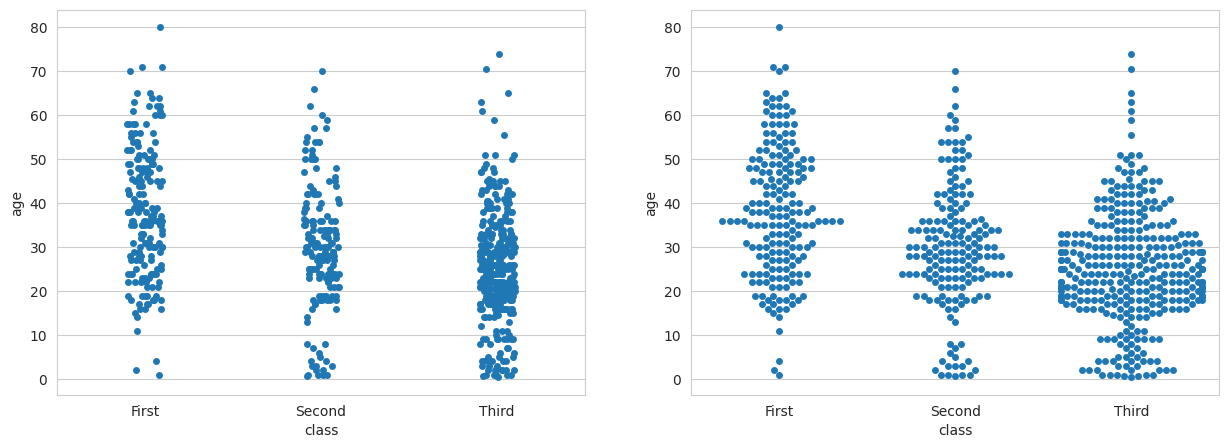

In [47]:
# 범주형 데이터  stripplot(), swarmplot() - 데이터의 분산까지 고려
# sns style  : darkgrid, whitegrid, dart, white, ticks
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(data= titanic,
              x='class',
              y='age',
              ax=ax1
              )

sns.swarmplot(data= titanic,
              x='class',
              y='age',
              ax=ax2
              )
plt.show()

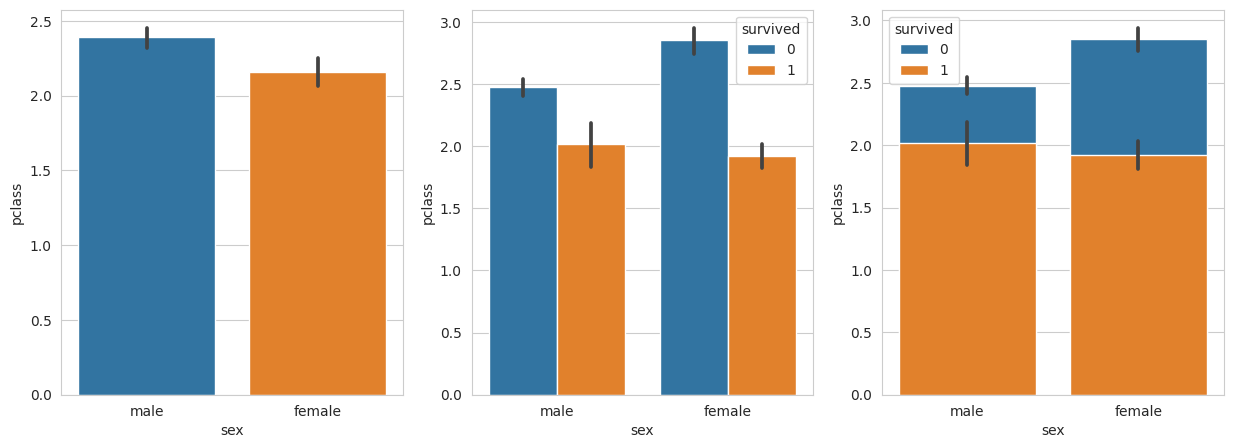

In [52]:
# 막대 그래프
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(data=titanic, x='sex', y='pclass', ax = ax1)
sns.barplot(data=titanic, x='sex', y='pclass', hue='survived', ax = ax2)
sns.barplot(data=titanic, x='sex', y='pclass', hue='survived', dodge=False, ax = ax3)
plt.show()

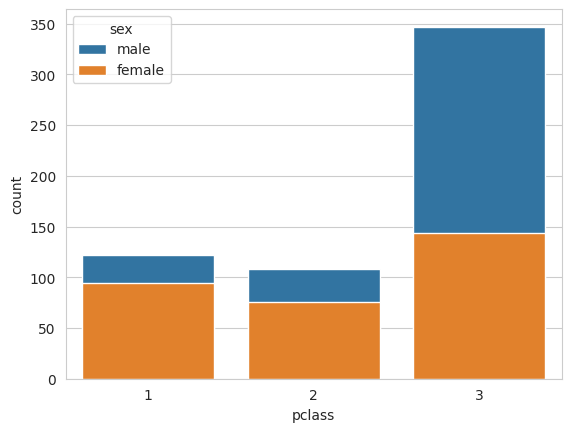

In [58]:
sns.countplot(data = titanic, x='pclass' ,hue='sex', dodge=False)
plt.show()

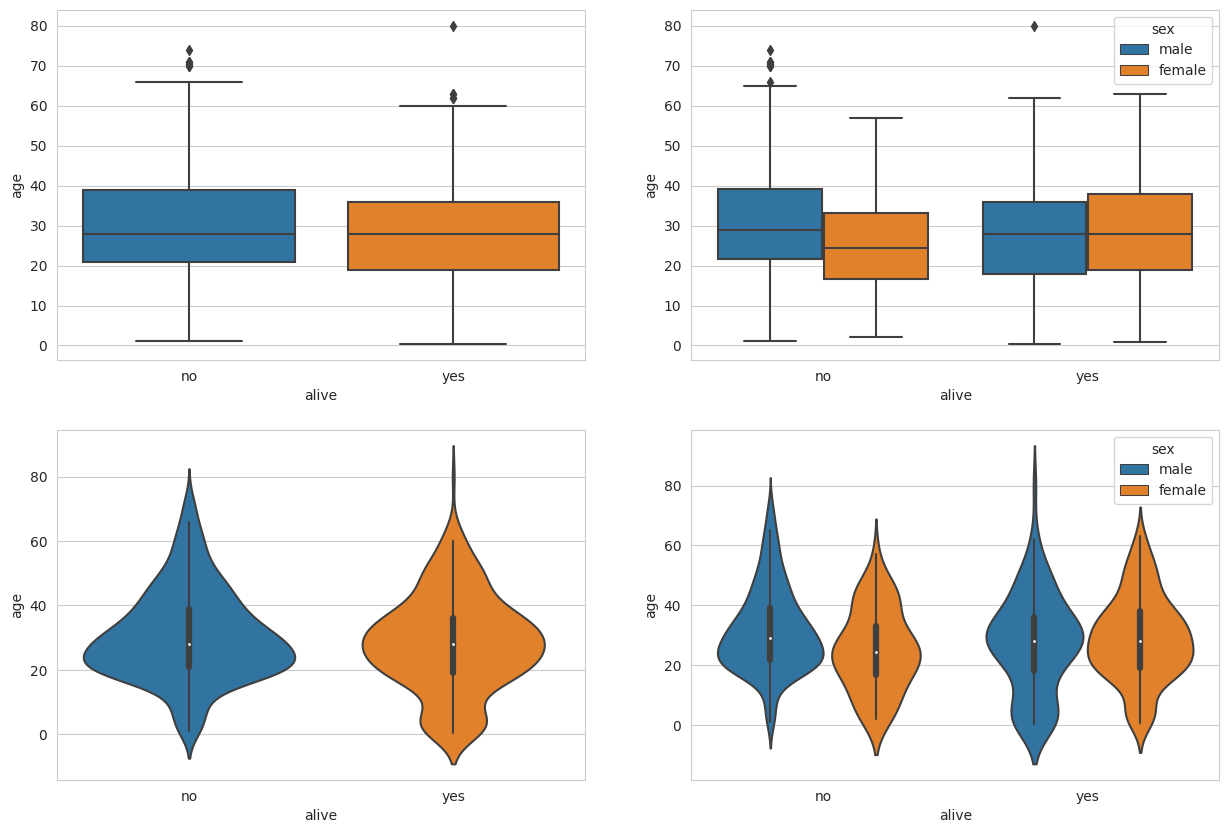

In [70]:
# seaborn boxplot
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(data=titanic,x='alive',y='age', ax=ax1)
sns.boxplot(data=titanic,x='alive',y='age', hue='sex', ax=ax2)
sns.violinplot(data=titanic,x='alive',y='age', ax=ax3)
sns.violinplot(data=titanic,x='alive',y='age', hue='sex', ax=ax4)
plt.show()

Text(0.5, 0.98, 'titanic fare - kde')

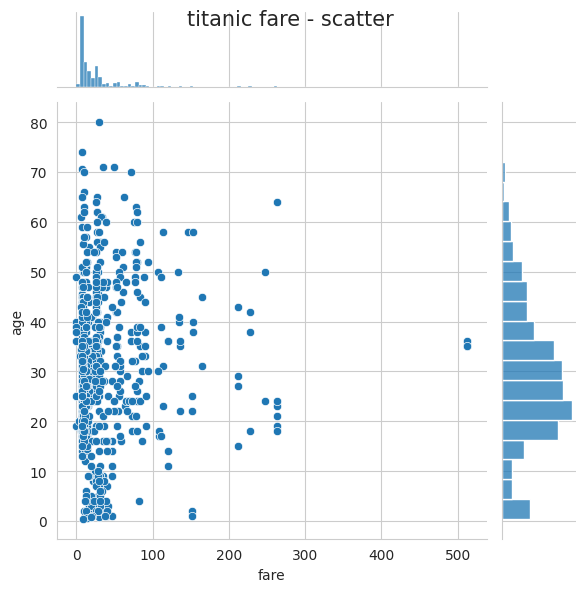

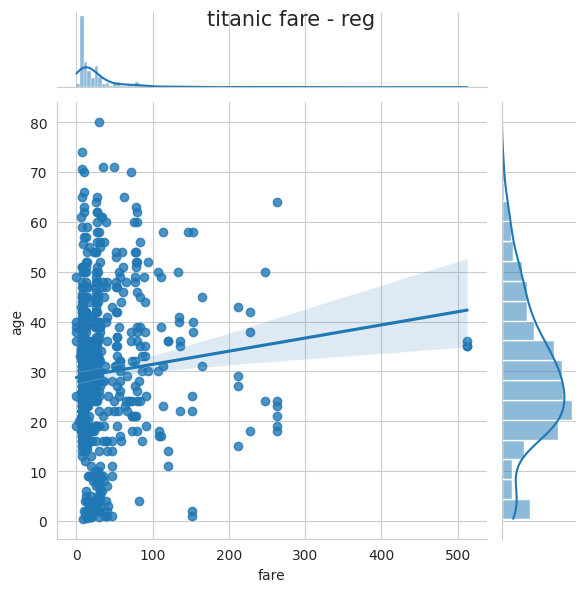

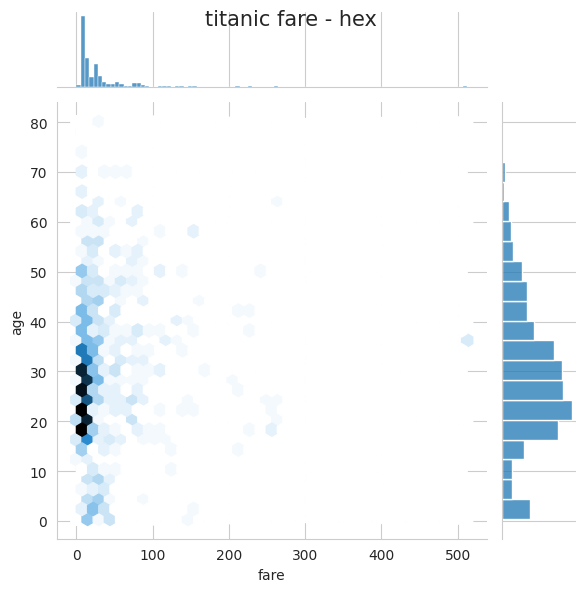

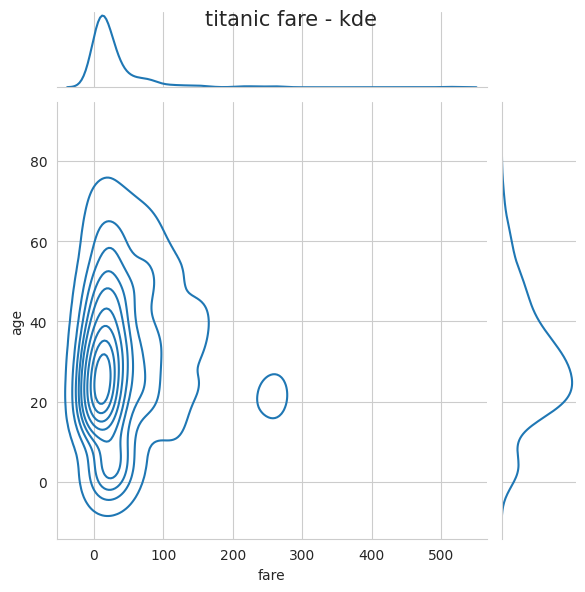

In [75]:
# 조인트 그래프
# 산점도를 기본으로 표기하고 x-y축에 각 변수에 대한 히스토그램을 동시에 보여준다.
# 두 변수간의 관계와 데이터가 분산되어 있는 정도를 파악하기 용이함
# 산점도, 추가 회귀선, 육각 산점도, 커널 밀집그래프 
sns.set_style('whitegrid')

j1=sns.jointplot(data=titanic, x='fare',y='age')
j2=sns.jointplot(data=titanic, x='fare',y='age', kind='reg')
j3=sns.jointplot(data=titanic, x='fare',y='age', kind='hex')
j4=sns.jointplot(data=titanic, x='fare',y='age', kind='kde')

j1.fig.suptitle('titanic fare - scatter', size = 15)
j2.fig.suptitle('titanic fare - reg', size = 15)
j3.fig.suptitle('titanic fare - hex', size = 15)
j4.fig.suptitle('titanic fare - kde', size = 15)

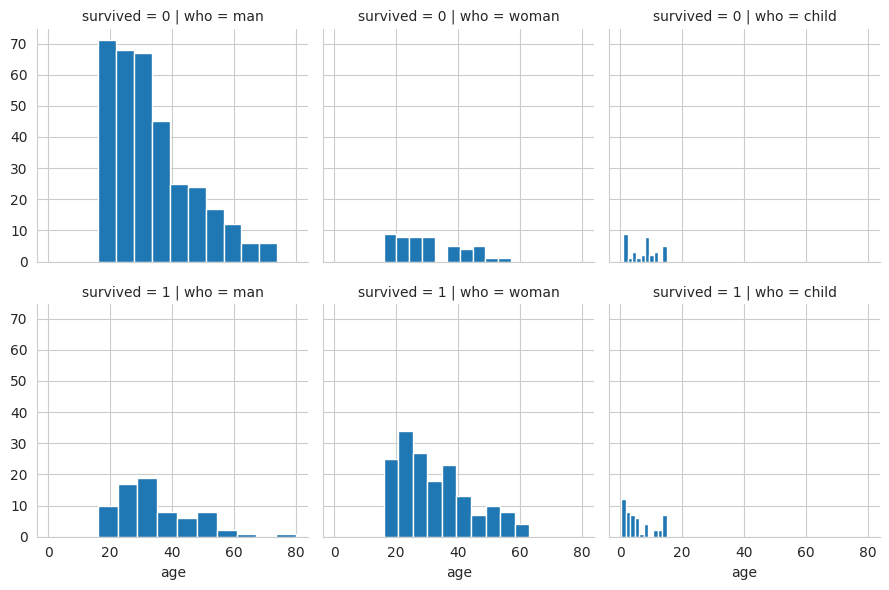

In [77]:
# 조건을 적용해서 화면을 그리드로 분할
# 조건에 따라 그리드를 나눔
g = sns.FacetGrid(data=titanic,col='who',row='survived')
g = g.map(plt.hist, 'age')

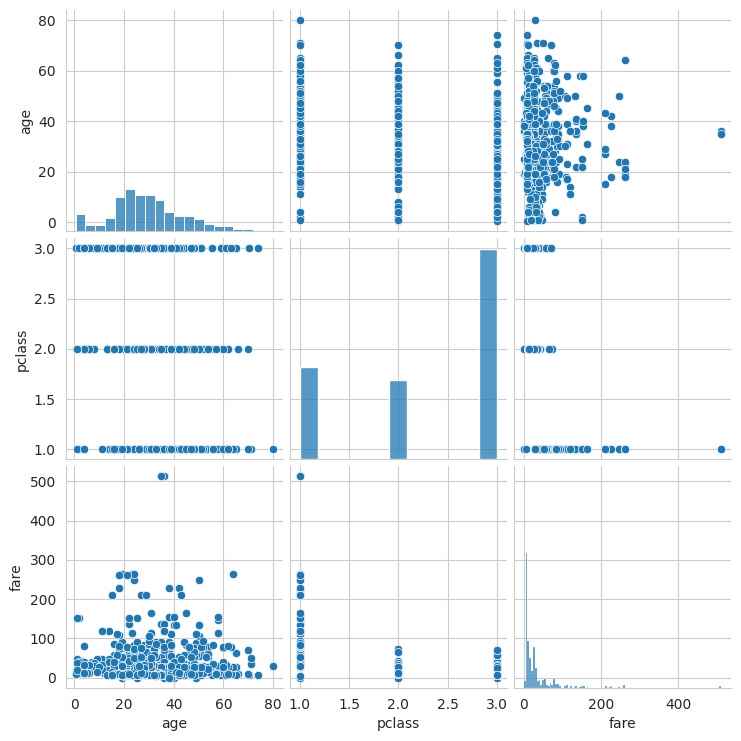

In [78]:
# 이변수 데이터 분포
titanic_pair =  titanic[['age','pclass','fare']]
g = sns.pairplot(titanic_pair)